# <span style="color:red; font-family:Roboto; font-size:1em;">Data Collection</span>

In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.impute import KNNImputer




In [186]:
data_2023 = pd.read_csv('data_2023_2024.csv')
data_2023 = data_2023.drop([
             '1Y_CPSCT','1Y_Intensive english','1Y_Seminar','1Y_Analysis I','1Y_Algebra','1Y_A. Com. I','1Y_Intro. Prog. C++','1Y_Analysis II',
                '1Y_A. Com. II','1Y_OOP','1Y_Linear Algebra','1Y_Proba Stat','2Y_Analysis III',
                '2Y_DSA','2Y_Archi 1','2Y_Logic','4. Forth:','5. Fifth:','6. sixth:','7. seventh:','8. eighth','2Y_Complexity','2Y_Proba Stat II'
                ,'2Y_Lin. Alg II','2Y_DataBases','2Y_Intro AI','2Y_Oper. res','2Y_Archi II','2Y_Oper. Syst'
                ,'2Y_Soft. Eng.','2Y_Web Prog.','2Y_Intro. Busin.'],axis=1)
data_2023.head()

,Gender,In which year of your studies are you currently enrolled:,BAC specialty,How many hours per week do you spend studying (personnal efforts):,Where do you prefer to study:,You prefer to study alone:,What learning methods do help you understand better:,What types of resources do you use most:,Do you use a planer or a schedule,Problems,...,In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:,2. Programming:\n,3. Computer science:,4. Mathematics,1Y_Average S1,1Y_Average S2,1Y_Average,2Y_Average S1,2Y_Average S2,2Y_Average
0,Male,First year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents, YouTube vi...",No,Pressure,...,7,7,9,6,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,Third year,Mathematics,10-17,In your room (dorms),In peer,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents",No,Teachers' teaching method,...,8,8,8,9,NaN,NaN,NaN,High,12.0,13.0
2,Male,First year,Science,18-25,In your room (dorms),Alone,Lectures,Online documents,Yes,Private life problems,...,8,5,7,6,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,Third year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, YouTube videos",No,Bad quality of internet,...,7,8,8,8,NaN,NaN,NaN,High,12.0,13.0
4,Female,Third year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Mind mapping...","Books, Online documents, YouTube videos",No,Teachers' teaching method,...,9,7,6,9,NaN,NaN,NaN,High,10.0,11.0


Drop the modules as we will work only with the average


In [187]:
data_2024 = pd.read_csv('data_2024_2025.csv')
data_2024.head()

,Gender,In which year of your studies are you currently enrolled:,BAC specialty,How many hours per week do you spend studying (personnal efforts):,Where do you prefer to study:,You prefer to study alone:,What learning methods do help you understand better:,What types of resources do you use most:,Do you use a planer or a schedule,Problems,...,4. Mathematics,1Y_Average S1,1Y_Average S2,1Y_Average,2Y_Average S1,2Y_Average S2,2Y_Average,3Y_Average S1,3Y_Average S2,3Y_Average
0,Female,First year,Science,18-25,In your room (dorms),Alone,Learning by practicing,Online tutorials,Yes,Pressure,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,First year,Science,10-17,In your room (dorms),Alone,"Lectures, Learning by practicing, Mind mapping...","Online documents, YouTube videos",No,Teachers' teaching method,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,Fourth year,Mathematics,18-25,In the school's library,In peer,"Learning by practicing, Project-based learning","Online tutorials, Online documents, YouTube vi...",No,Lack of previous knowledge or experience in th...,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,Second year,Science,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Mind mapping...","Online tutorials, YouTube videos",No,Pressure,...,7,12.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,First year,Mathematics,10-17,In your room (dorms),Alone,Learning by practicing,Online tutorials,No,Pressure,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
data_2023.columns

Index(['Gender', 'In which year of your studies are you currently enrolled:',
       'BAC specialty',
       'How many hours per week do you spend studying (personnal efforts):',
       'Where do you prefer to study:', 'You prefer to study alone: ',
       'What learning methods do help you understand better: ',
       'What types of resources do you use most:',
       'Do you use a planer or a schedule', 'Problems', '2. Second:',
       '3. Third:', 'Rate your satisfaction with the schools program:',
       'Do you engage in any external activities (not related to the study field):',
       'Your level of motivation for joining ENSIA',
       'How much do you like the field of Artificial Intelligence :',
       'How do others feedbacks influence you:',
       'How many hours do you sleep ',
       'How well do you handle stress and pressure :',
       'In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:',
       '2. Programming:\n', '3. Computer scie

In [189]:
data_2024.columns

Index(['Gender', 'In which year of your studies are you currently enrolled:',
       'BAC specialty',
       'How many hours per week do you spend studying (personnal efforts):',
       'Where do you prefer to study:', 'You prefer to study alone: ',
       'What learning methods do help you understand better: ',
       'What types of resources do you use most:',
       'Do you use a planer or a schedule', 'Problems', '2. Second:',
       '3. Third:', 'Rate your satisfaction with the schools program:',
       'Do you engage in any external activities (not related to the study field):',
       'Your level of motivation for joining ENSIA',
       'How much do you like the field of Artificial Intelligence :',
       'How do others feedbacks influence you:',
       'How many hours do you sleep ',
       'How well do you handle stress and pressure :',
       'In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:',
       '2. Programming:\n', '3. Computer scie

In [190]:
data_2024.head()

,Gender,In which year of your studies are you currently enrolled:,BAC specialty,How many hours per week do you spend studying (personnal efforts):,Where do you prefer to study:,You prefer to study alone:,What learning methods do help you understand better:,What types of resources do you use most:,Do you use a planer or a schedule,Problems,...,4. Mathematics,1Y_Average S1,1Y_Average S2,1Y_Average,2Y_Average S1,2Y_Average S2,2Y_Average,3Y_Average S1,3Y_Average S2,3Y_Average
0,Female,First year,Science,18-25,In your room (dorms),Alone,Learning by practicing,Online tutorials,Yes,Pressure,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,First year,Science,10-17,In your room (dorms),Alone,"Lectures, Learning by practicing, Mind mapping...","Online documents, YouTube videos",No,Teachers' teaching method,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,Fourth year,Mathematics,18-25,In the school's library,In peer,"Learning by practicing, Project-based learning","Online tutorials, Online documents, YouTube vi...",No,Lack of previous knowledge or experience in th...,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,Second year,Science,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Mind mapping...","Online tutorials, YouTube videos",No,Pressure,...,7,12.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,First year,Mathematics,10-17,In your room (dorms),Alone,Learning by practicing,Online tutorials,No,Pressure,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
data_2023.head()

,Gender,In which year of your studies are you currently enrolled:,BAC specialty,How many hours per week do you spend studying (personnal efforts):,Where do you prefer to study:,You prefer to study alone:,What learning methods do help you understand better:,What types of resources do you use most:,Do you use a planer or a schedule,Problems,...,In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:,2. Programming:\n,3. Computer science:,4. Mathematics,1Y_Average S1,1Y_Average S2,1Y_Average,2Y_Average S1,2Y_Average S2,2Y_Average
0,Male,First year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents, YouTube vi...",No,Pressure,...,7,7,9,6,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,Third year,Mathematics,10-17,In your room (dorms),In peer,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents",No,Teachers' teaching method,...,8,8,8,9,NaN,NaN,NaN,High,12.0,13.0
2,Male,First year,Science,18-25,In your room (dorms),Alone,Lectures,Online documents,Yes,Private life problems,...,8,5,7,6,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,Third year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, YouTube videos",No,Bad quality of internet,...,7,8,8,8,NaN,NaN,NaN,High,12.0,13.0
4,Female,Third year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Mind mapping...","Books, Online documents, YouTube videos",No,Teachers' teaching method,...,9,7,6,9,NaN,NaN,NaN,High,10.0,11.0


In [192]:
data_2024.columns = data_2024.columns.str.replace('\r', '')

In [193]:
# Concatenate the dataframes
data = pd.concat([data_2023, data_2024], ignore_index=True)

# Display the first few rows of the combined dataframe
data.head()

,Gender,In which year of your studies are you currently enrolled:,BAC specialty,How many hours per week do you spend studying (personnal efforts):,Where do you prefer to study:,You prefer to study alone:,What learning methods do help you understand better:,What types of resources do you use most:,Do you use a planer or a schedule,Problems,...,4. Mathematics,1Y_Average S1,1Y_Average S2,1Y_Average,2Y_Average S1,2Y_Average S2,2Y_Average,3Y_Average S1,3Y_Average S2,3Y_Average
0,Male,First year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents, YouTube vi...",No,Pressure,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,Third year,Mathematics,10-17,In your room (dorms),In peer,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents",No,Teachers' teaching method,...,9,NaN,NaN,NaN,High,12.0,13.0,NaN,NaN,NaN
2,Male,First year,Science,18-25,In your room (dorms),Alone,Lectures,Online documents,Yes,Private life problems,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,Third year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, YouTube videos",No,Bad quality of internet,...,8,NaN,NaN,NaN,High,12.0,13.0,NaN,NaN,NaN
4,Female,Third year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Mind mapping...","Books, Online documents, YouTube videos",No,Teachers' teaching method,...,9,NaN,NaN,NaN,High,10.0,11.0,NaN,NaN,NaN


In [194]:
data.shape

(475, 32)

In [195]:
data_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 32 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Gender                                                                                 200 non-null    object 
 1   In which year of your studies are you currently enrolled:                              200 non-null    object 
 2   BAC specialty                                                                          200 non-null    object 
 3   How many hours per week do you spend studying (personnal efforts):                     200 non-null    object 
 4   Where do you prefer to study:                                                          200 non-null    object 
 5   You prefer to study alone:                                                    

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 32 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Gender                                                                                 475 non-null    object 
 1   In which year of your studies are you currently enrolled:                              475 non-null    object 
 2   BAC specialty                                                                          475 non-null    object 
 3   How many hours per week do you spend studying (personnal efforts):                     475 non-null    object 
 4   Where do you prefer to study:                                                          475 non-null    object 
 5   You prefer to study alone:                                                    

In [197]:
data.to_csv('student_performance.csv', index=False)

**Data Preprocessing**

In [198]:
columns_to_drop = ['1Y_Average S1','1Y_Average S2','2Y_Average S1','2Y_Average S2','3Y_Average S1','3Y_Average S2']
data.drop(columns=columns_to_drop, inplace=True)

handling missing values

In [199]:
data.head()

,Gender,In which year of your studies are you currently enrolled:,BAC specialty,How many hours per week do you spend studying (personnal efforts):,Where do you prefer to study:,You prefer to study alone:,What learning methods do help you understand better:,What types of resources do you use most:,Do you use a planer or a schedule,Problems,...,How do others feedbacks influence you:,How many hours do you sleep,How well do you handle stress and pressure :,In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:,2. Programming:\n,3. Computer science:,4. Mathematics,1Y_Average,2Y_Average,3Y_Average
0,Male,First year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents, YouTube vi...",No,Pressure,...,Negatively,5-7 hours,2,7,7,9,6,NaN,NaN,NaN
1,Female,Third year,Mathematics,10-17,In your room (dorms),In peer,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents",No,Teachers' teaching method,...,You do not care about,5-7 hours,3,8,8,8,9,NaN,13.0,NaN
2,Male,First year,Science,18-25,In your room (dorms),Alone,Lectures,Online documents,Yes,Private life problems,...,You do not care about,5-7 hours,5,8,5,7,6,NaN,NaN,NaN
3,Male,Third year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, YouTube videos",No,Bad quality of internet,...,Positively,5-7 hours,4,7,8,8,8,NaN,13.0,NaN
4,Female,Third year,Mathematics,18-25,In your room (dorms),Alone,"Lectures, Learning by practicing, Mind mapping...","Books, Online documents, YouTube videos",No,Teachers' teaching method,...,You do not care about,5-7 hours,2,9,7,6,9,NaN,11.0,NaN


In [200]:
#filling missing data with the median

data['1Y_Average'].fillna(data['1Y_Average'].median(), inplace=True)
data['2Y_Average'].fillna(data['2Y_Average'].median(), inplace=True)
data['3Y_Average'].fillna(data['1Y_Average'].median(), inplace=True)


/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_98173/3864425523.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['1Y_Average'].fillna(data['1Y_Average'].median(), inplace=True)
/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_98173/3864425523.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [201]:
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of missing values:
	Gender: 0
	In which year of your studies are you currently enrolled:: 0
	BAC specialty: 0
	How many hours per week do you spend studying (personnal efforts):: 0
	Where do you prefer to study:: 0
	You prefer to study alone: : 0
	What learning methods do help you understand better: : 0
	What types of resources do you use most:: 1
	Do you use a planer or a schedule: 0
	Problems: 0
	2. Second:: 0
	3. Third:: 0
	Rate your satisfaction with the schools program:: 0
	Do you engage in any external activities (not related to the study field):: 0
	Your level of motivation for joining ENSIA: 0
	How much do you like the field of Artificial Intelligence :: 0
	How do others feedbacks influence you:: 0
	How many hours do you sleep : 0
	How well do you handle stress and pressure :: 0
	In a scale of 1 to 10 how do you rate your level in the following fields:
1. English:: 0
	2. Programming:
: 0
	3. Computer science:: 0
	4. Mathematics: 0
	1Y_Average: 0
	2Y_Average: 0
	3Y_Averag

In [202]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [203]:
print(data['How many hours per week do you spend studying (personnal efforts):'].unique())

['18-25' '10-17' '34-41' 'More than 41 hours' '26-33' 'More than 41']


In [204]:
# Split column into two
lat_long = data['How many hours per week do you spend studying (personnal efforts):'].str.split("-", expand = True)
# Assign correct columns to start and end columns in data
data['Study hours start time'] = lat_long[0]
data['Study hours end time'] = lat_long[1]
data = data.replace('More than 41 hours','42')
data = data.replace('More than 41','42')
data['Study hours end time'].fillna('60',inplace=True)
data.drop('How many hours per week do you spend studying (personnal efforts):', axis = 1, inplace = True)

# Print the header
data.head()

/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_98173/2866710651.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Study hours end time'].fillna('60',inplace=True)


,Gender,In which year of your studies are you currently enrolled:,BAC specialty,Where do you prefer to study:,You prefer to study alone:,What learning methods do help you understand better:,What types of resources do you use most:,Do you use a planer or a schedule,Problems,2. Second:,...,How well do you handle stress and pressure :,In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:,2. Programming:\n,3. Computer science:,4. Mathematics,1Y_Average,2Y_Average,3Y_Average,Study hours start time,Study hours end time
0,Male,First year,Mathematics,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents, YouTube vi...",No,Pressure,Private life problems,...,2,7,7,9,6,13.0,12.0,13.0,18,25
1,Female,Third year,Mathematics,In your room (dorms),In peer,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents",No,Teachers' teaching method,Lack of time,...,3,8,8,8,9,13.0,13.0,13.0,10,17
2,Male,First year,Science,In your room (dorms),Alone,Lectures,Online documents,Yes,Private life problems,Lack of time,...,5,8,5,7,6,13.0,12.0,13.0,18,25
3,Male,Third year,Mathematics,In your room (dorms),Alone,"Lectures, Learning by practicing, Project-base...","Online tutorials, YouTube videos",No,Bad quality of internet,Lack of previous knowledge or experience in th...,...,4,7,8,8,8,13.0,13.0,13.0,18,25
4,Female,Third year,Mathematics,In your room (dorms),Alone,"Lectures, Learning by practicing, Mind mapping...","Books, Online documents, YouTube videos",No,Teachers' teaching method,Lack of previous knowledge or experience in th...,...,2,9,7,6,9,13.0,11.0,13.0,18,25


In [205]:
print(data['Study hours end time'].unique())
print(data['Study hours start time'].unique())

['25' '17' '41' '60' '33']
['18' '10' '34' '42' '26']


In [206]:
data['You prefer to study alone: '].unique()

array(['Alone', 'In peer', 'With a group'], dtype=object)

In [207]:
for col in data.columns:
    print(f"Column: {col}")
    print(f"Unique values: {len(data[col].unique())}")
    print(data[col].value_counts())
    print("\n")

Column: Gender
Unique values: 2
Gender
Female    269
Male      206
Name: count, dtype: int64


Column: In which year of your studies are you currently enrolled:
Unique values: 5
In which year of your studies are you currently enrolled:
First year     215
Second year    164
Third year      48
Thirs year      33
Fourth year     15
Name: count, dtype: int64


Column: BAC specialty
Unique values: 3
BAC specialty
Mathematics        281
Science            143
Technical maths     51
Name: count, dtype: int64


Column: Where do you prefer to study:
Unique values: 4
Where do you prefer to study:
In your room (dorms)       272
In the school's library    134
At home                     62
In the dorms' library        7
Name: count, dtype: int64


Column: You prefer to study alone: 
Unique values: 3
You prefer to study alone: 
Alone           382
In peer          68
With a group     25
Name: count, dtype: int64


Column: What learning methods do help you understand better: 
Unique values: 52
What 

In [208]:
mappings = {'Alone': '1',
            'In peer': '2',
            'With a group': '3'}
gender_mappings = {
    'Female' : '0',
    'Male' : '1'
}
feedback_mapping = {
    'You do not care about': 0,
    'Positively': 1,
    'Negatively': 2
}
activity_mapping = {'No': 0, 'Yes': 1}
planer_mapping = {'No': 0, 'Yes': 1}
sleep_mapping = {
    '5-7 hours': 6,
    '8 hours or more': 8,
    '4 hours or less': 2
}
problems_mapping = {'Teaching language': 1, 'Bad quality of internet': 2, 'Lack of time': 3, 'Lack of previous knowledge or experience in the field': 4 , 'Teachers\' teaching method': 5, 'Pressure':6 , 'Not having a good (powerful) computer' :7 ,'Private life problems':8 }

study_place_mapping = {
    "In your room (dorms)": 1,
    "In the school's library": 2,
    "At home": 3,
    "In the dorms' library": 2
}
year_mapping = {
    'First year': 1,
    'Second year': 2,
    'Third year': 3,
    'Thirs year': 3,
    'Fourth year': 4
}
bac_specialty_mapping = {
    'Mathematics': 1,
    'Science': 2,
    'Technical maths': 3
}



data['In which year of your studies are you currently enrolled:'] = data['In which year of your studies are you currently enrolled:'].replace(year_mapping).astype(int)
data['BAC specialty'] = data['BAC specialty'].replace(bac_specialty_mapping).astype(int)
data['Where do you prefer to study:'] = data['Where do you prefer to study:'].replace(study_place_mapping).astype(int)
data['Do you use a planer or a schedule'] = data['Do you use a planer or a schedule'].replace(planer_mapping).astype(int)
data['How many hours do you sleep '] = data['How many hours do you sleep '].replace(sleep_mapping).astype(int)
data['How do others feedbacks influence you:'] = data['How do others feedbacks influence you:'].replace(feedback_mapping).astype(int)
data['Do you engage in any external activities (not related to the study field):'] = data['Do you engage in any external activities (not related to the study field):'].replace(activity_mapping).astype(int)
data['Problems'] = data['Problems'].replace(problems_mapping).astype(int)
data['2. Second:'] = data['2. Second:'].replace(problems_mapping).astype(int)
data['3. Third:'] = data['3. Third:'].replace(problems_mapping).astype(int)
data['Gender'] = data['Gender'].replace(gender_mappings).astype(int)
data['You prefer to study alone: '] = data['You prefer to study alone: '].replace(mappings).astype(int)

/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_98173/461374260.py:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['In which year of your studies are you currently enrolled:'] = data['In which year of your studies are you currently enrolled:'].replace(year_mapping).astype(int)
/var/folders/lt/lzstf0g942b2sl1qy9xybfnw0000gn/T/ipykernel_98173/461374260.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['BAC specialty'] = data['BAC specialty'].replace(bac_specialty_mapping).astype(int)
/var/folders/lt/lzstf0g

In [209]:
data.dtypes

Gender                                                                                      int64
In which year of your studies are you currently enrolled:                                   int64
BAC specialty                                                                               int64
Where do you prefer to study:                                                               int64
You prefer to study alone:                                                                  int64
What learning methods do help you understand better:                                       object
What types of resources do you use most:                                                   object
Do you use a planer or a schedule                                                           int64
Problems                                                                                    int64
2. Second:                                                                                  int64
3. Third:           

In [210]:
data.head()

,Gender,In which year of your studies are you currently enrolled:,BAC specialty,Where do you prefer to study:,You prefer to study alone:,What learning methods do help you understand better:,What types of resources do you use most:,Do you use a planer or a schedule,Problems,2. Second:,...,How well do you handle stress and pressure :,In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:,2. Programming:\n,3. Computer science:,4. Mathematics,1Y_Average,2Y_Average,3Y_Average,Study hours start time,Study hours end time
0,1,1,1,1,1,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents, YouTube vi...",0,6,8,...,2,7,7,9,6,13.0,12.0,13.0,18,25
1,0,3,1,1,2,"Lectures, Learning by practicing, Project-base...","Online tutorials, Online documents",0,5,3,...,3,8,8,8,9,13.0,13.0,13.0,10,17
2,1,1,2,1,1,Lectures,Online documents,1,8,3,...,5,8,5,7,6,13.0,12.0,13.0,18,25
3,1,3,1,1,1,"Lectures, Learning by practicing, Project-base...","Online tutorials, YouTube videos",0,2,4,...,4,7,8,8,8,13.0,13.0,13.0,18,25
4,0,3,1,1,1,"Lectures, Learning by practicing, Mind mapping...","Books, Online documents, YouTube videos",0,5,4,...,2,9,7,6,9,13.0,11.0,13.0,18,25


In [211]:
data['Study hours start time'] = data['Study hours start time'].astype('int')
data['Study hours end time'] = data['Study hours end time'].astype('int')

In [212]:
data.rename(columns={
    'Gender': 'gender',
    'In which year of your studies are you currently enrolled:': 'year_of_study',
    'BAC specialty': 'bac_specialty',
    'Where do you prefer to study:': 'study_place',
    'You prefer to study alone: ': 'study_preference',
    'What learning methods do help you understand better: ': 'learning_methods',
    'What types of resources do you use most:': 'resources_used',
    'Do you use a planer or a schedule': 'use_planner',
    'Problems': 'problems',
    '2. Second:': 'second_problem',
    '3. Third:': 'third_problem',
    'Rate your satisfaction with the schools program:': 'satisfaction_with_program',
    'Do you engage in any external activities (not related to the study field):': 'external_activities',
    'Your level of motivation for joining ENSIA': 'motivation_for_joining',
    'How much do you like the field of Artificial Intelligence :': 'interest_in_ai',
    'How do others feedbacks influence you:': 'feedback_influence',
    'How many hours do you sleep ': 'sleep_hours',
    'How well do you handle stress and pressure :': 'stress_handling',
    'In a scale of 1 to 10 how do you rate your level in the following fields:\n1. English:': 'english_level',
    '2. Programming:\n': 'programming_level',
    '3. Computer science:': 'cs_level',
    '4. Mathematics': 'math_level',

    '1Y_Average': '1Y_avg',
  
    '2Y_Average': '2Y_avg',

    '3Y_Average': '3Y_avg',
    'Study hours start time': 'study_hours_start',
    'Study hours end time': 'study_hours_end'
}, inplace=True)


# <span style="color:red; font-family:Roboto; font-size:2em;">Exploratory Data Analysis (EDA)</span>


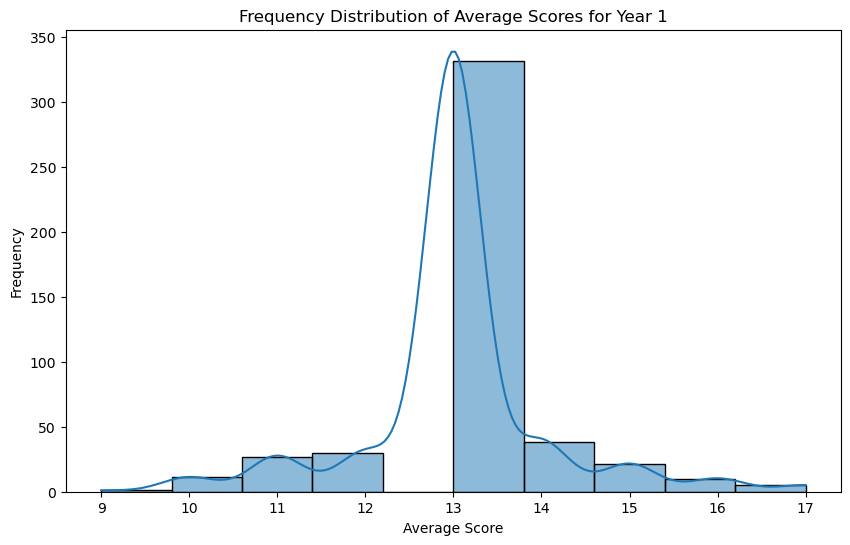

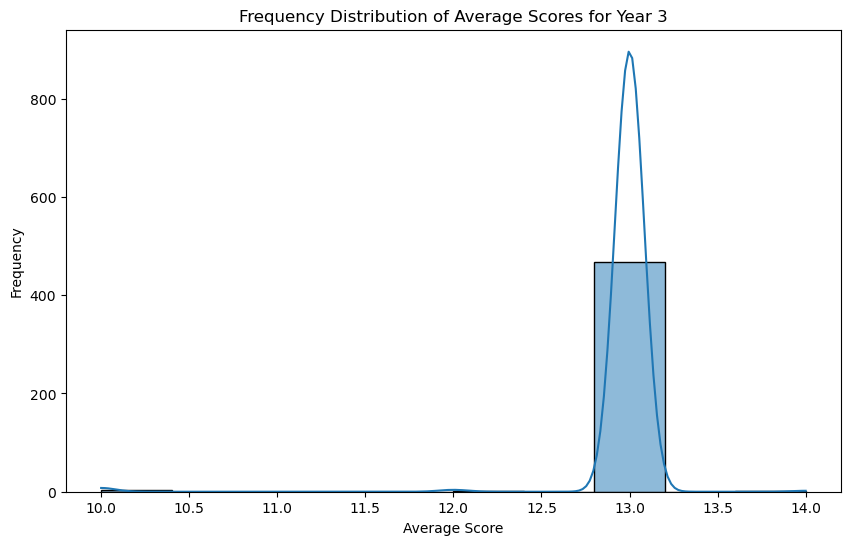

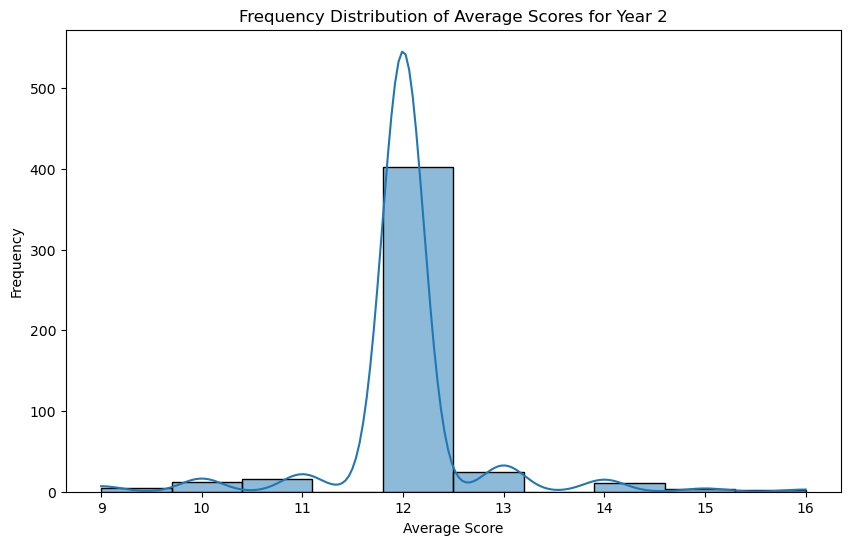

In [220]:
unique_years = data['year_of_study'].unique()

for year in unique_years:
    if year in [1, 2, 3]:
        plt.figure(figsize=(10, 6))
        
        sns.histplot(data[f'{year}Y_avg'], bins=10, kde=True)
        plt.title(f'Frequency Distribution of Average Scores for Year {year}')
        plt.xlabel('Average Score')
        plt.ylabel('Frequency')
        plt.show()

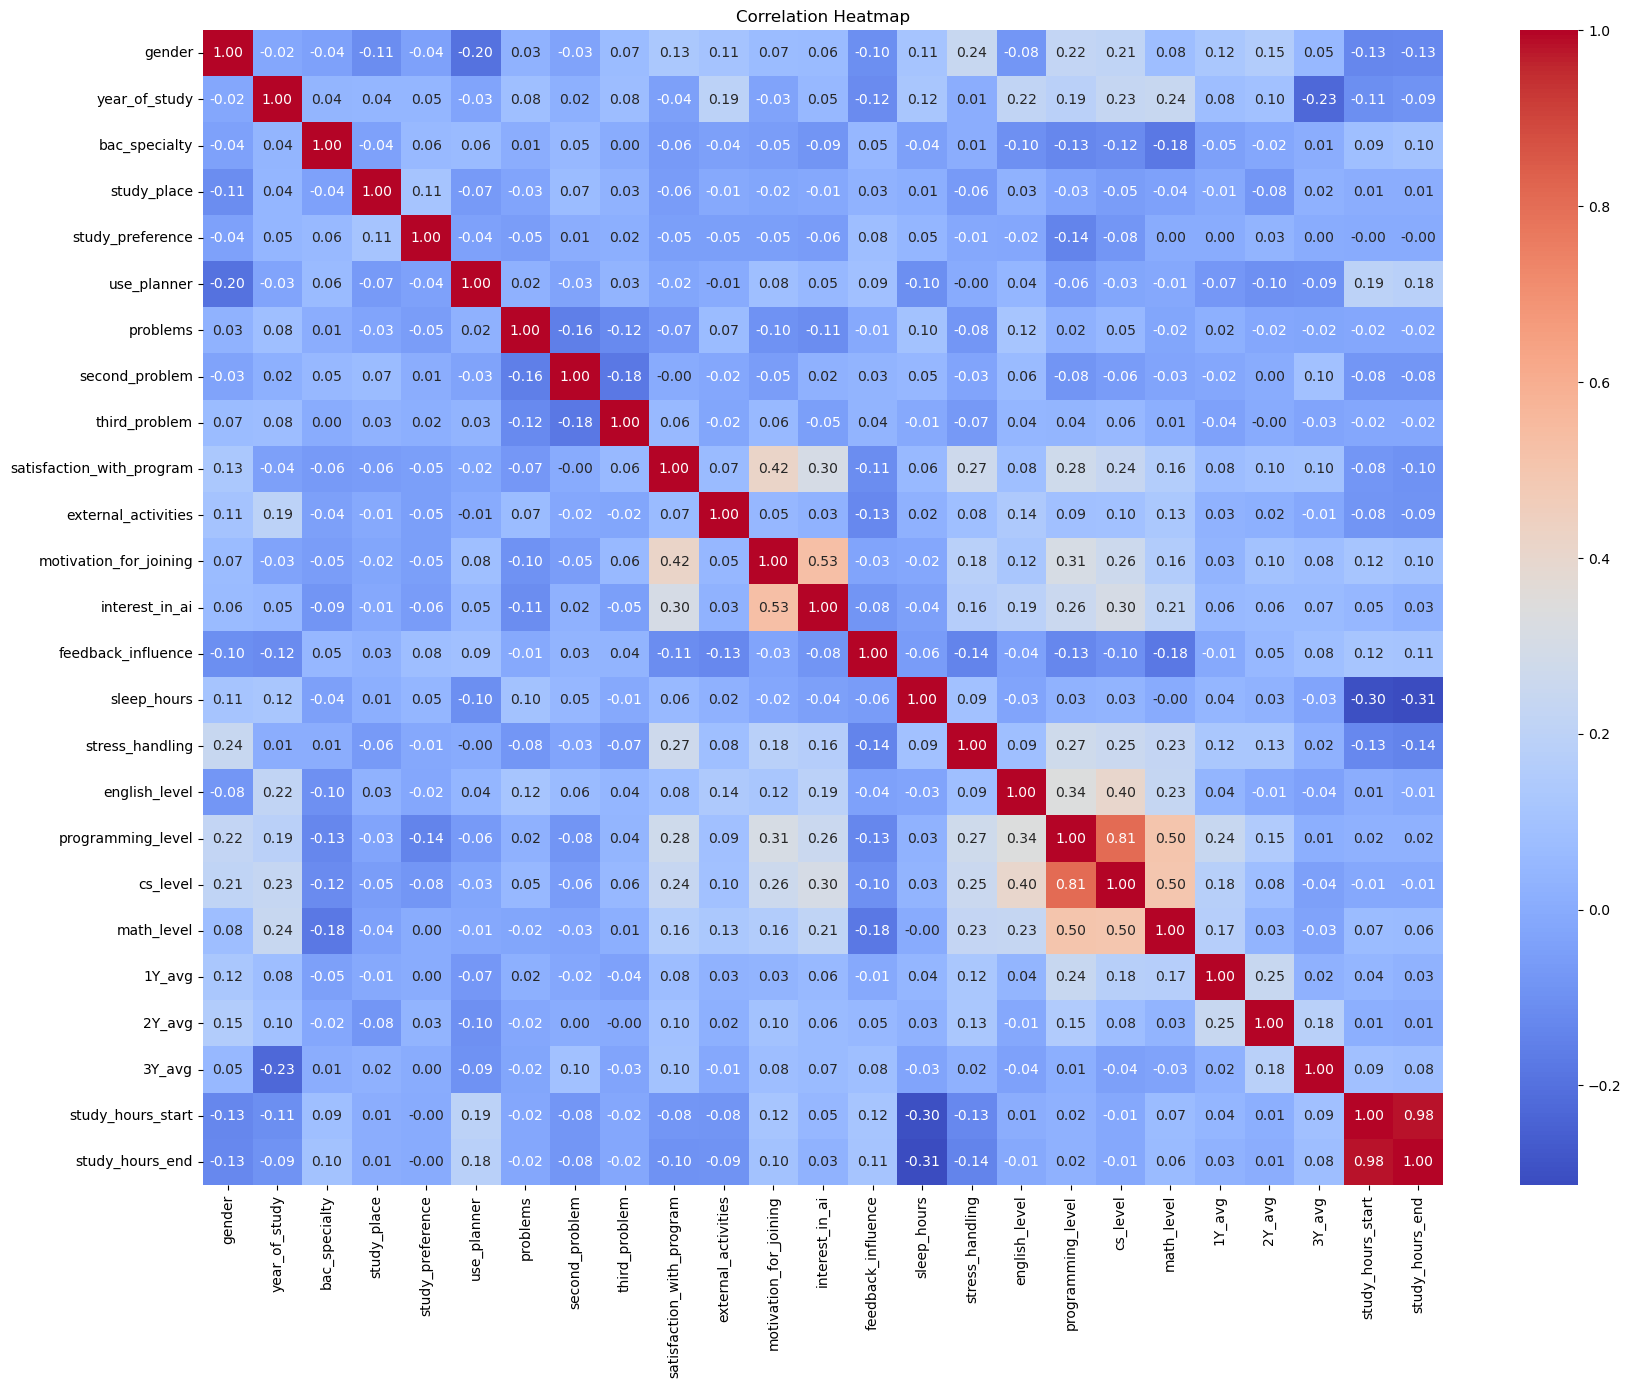

In [214]:

# Correlation heatmap
plt.figure(figsize=(20, 15))
corr = data.select_dtypes(exclude=['object']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

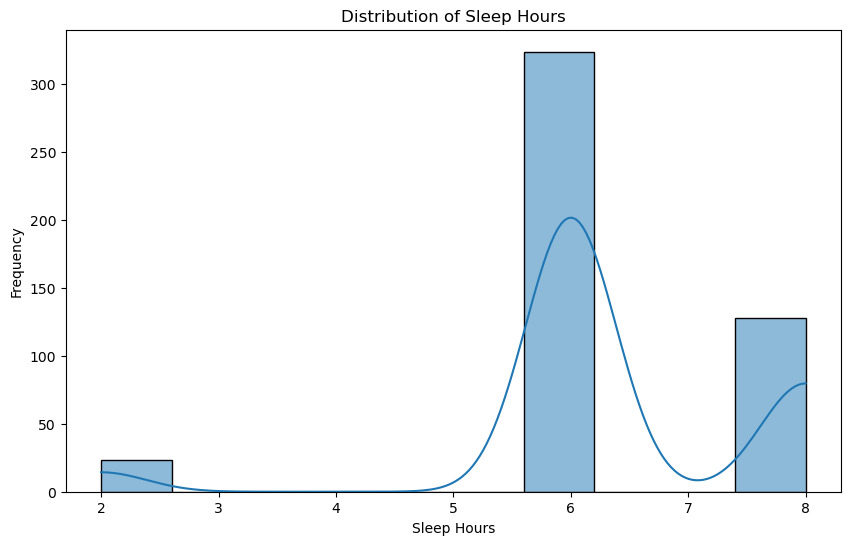

In [215]:
# Distribution of sleep hours
plt.figure(figsize=(10, 6))
sns.histplot(data['sleep_hours'], bins=10, kde=True)
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

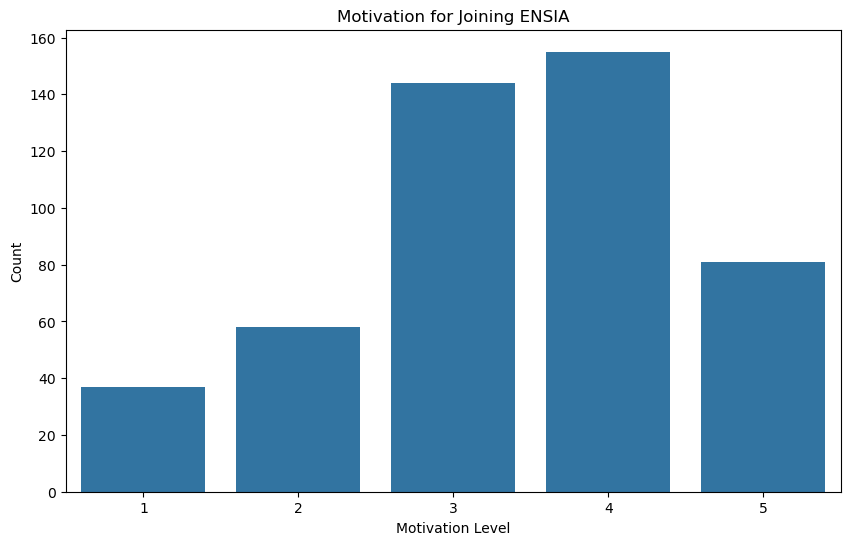

In [216]:
plt.figure(figsize=(10, 6))
sns.countplot(x='motivation_for_joining', data=data)
plt.title('Motivation for Joining ENSIA')
plt.xlabel('Motivation Level')
plt.ylabel('Count')
plt.show()

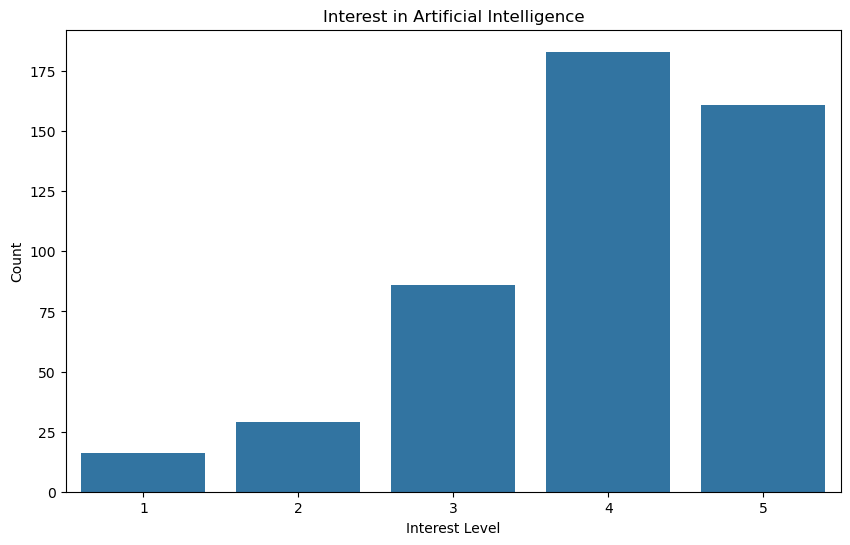

In [217]:
plt.figure(figsize=(10, 6))
sns.countplot(x='interest_in_ai', data=data)
plt.title('Interest in Artificial Intelligence')
plt.xlabel('Interest Level')
plt.ylabel('Count')
plt.show()